## Carga de bibiliotecas a utilizar ##

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

## Carga, análisis y normalización del DataFrame ##

In [36]:
datos=pd.read_csv('/content/drive/MyDrive/datos_TelecomXprocesado.csv')

In [37]:
datos=datos.drop(['customerID'],axis=1)

In [38]:
datos.sample(10)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1524,0,Female,0,1,0,40,1,1,Fiber optic,0,0,0,1,0,0,Month-to-month,1,Credit card (automatic),78.85,3126.85
5810,1,Female,0,1,1,33,1,1,No,0,0,0,0,0,0,Two year,1,Mailed check,24.50,740.30
6422,1,Male,0,1,1,32,1,1,Fiber optic,1,0,0,0,1,1,Month-to-month,1,Credit card (automatic),99.55,3204.65
6243,0,Male,0,1,1,59,1,1,Fiber optic,1,1,0,1,1,1,Two year,1,Mailed check,111.10,6555.20
6444,0,Male,0,1,0,63,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,19.25,1237.65
2261,0,Male,0,0,0,53,0,0,DSL,1,1,0,0,0,1,Month-to-month,1,Bank transfer (automatic),46.30,2546.85
496,0,Female,0,1,1,49,1,1,Fiber optic,0,0,0,0,1,1,Month-to-month,1,Bank transfer (automatic),95.40,4613.95
7176,0,Female,0,1,1,17,1,0,No,0,0,0,0,0,0,One year,0,Mailed check,20.75,418.25
6565,0,Female,1,1,0,32,1,1,Fiber optic,0,0,1,0,0,0,Month-to-month,0,Mailed check,79.30,2570.00
7160,0,Female,1,1,1,70,1,1,Fiber optic,0,1,1,1,1,1,One year,1,Electronic check,107.90,7475.85


In [39]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  


In [40]:
datos.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


## Creación de Gráficos ##

**ACLARACIÓN!!!**  
- **Churn (Abandono)**:  
  - `0`: Cliente activo  
  - `1`: Cliente que abandonó  

Cargo el dataframe original para poder crear gráficos

In [41]:
datos_original = pd.read_csv('/content/drive/MyDrive/datos_TelecomXprocesado.csv')


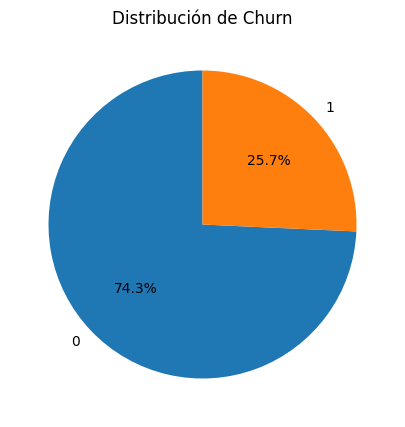

In [42]:
plt.figure(figsize=(8,5))
plt.pie(datos['Churn'].value_counts(),labels=datos['Churn'].value_counts().index,autopct='%1.1f%%',startangle=90)
plt.title('Distribución de Churn')
plt.show()

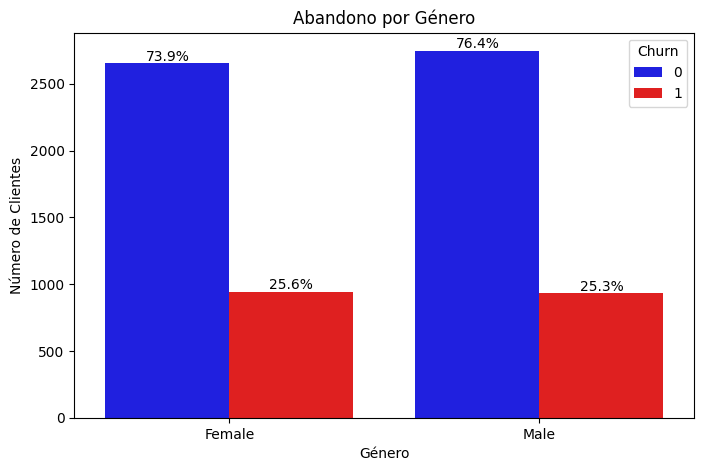

In [43]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=datos, x='gender', hue='Churn', palette={0: 'blue', 1: 'red'})
plt.title('Abandono por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')


total_counts = datos.groupby('gender')['Churn'].count()
churn_counts = datos.groupby(['gender', 'Churn'])['Churn'].count().unstack()

for i,  container in enumerate(ax.containers):
    for j, p in enumerate(container.patches):
        gender = total_counts.index[i]
        churn_status = churn_counts.columns[j]
        count = p.get_height()
        total = total_counts[gender]
        percentage = f'{100 * count / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

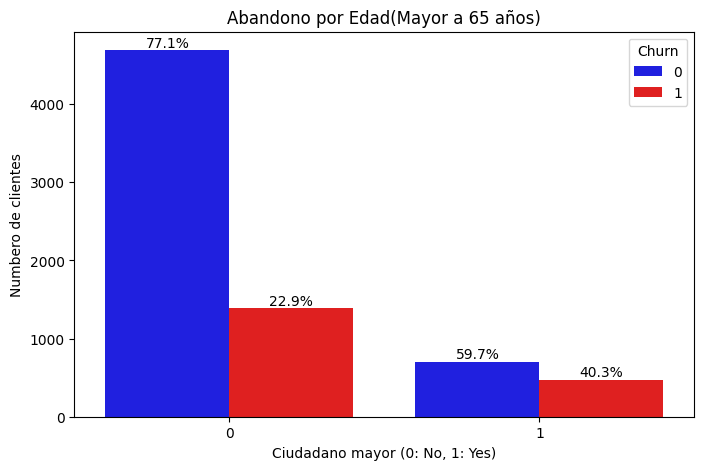

In [44]:


plt.figure(figsize=(8, 5))
ax = sns.countplot(data=datos_original, x='SeniorCitizen', hue='Churn', palette={0: 'blue', 1: 'red'})
plt.title('Abandono por Edad(Mayor a 65 años)')
plt.xlabel('Ciudadano mayor (0: No, 1: Yes)')
plt.ylabel('Numbero de clientes')

total_counts = datos_original.groupby('SeniorCitizen')['Churn'].count()
churn_counts = datos_original.groupby(['SeniorCitizen', 'Churn'])['Churn'].count().unstack()

churn_counts = churn_counts.reindex(columns=[0, 1], fill_value=0)


for container in ax.containers:
    churn_status = ax.containers.index(container)

    for p in container.patches:
        x_pos = p.get_x() + p.get_width() / 2
        closest_index = min(range(len(ax.get_xticks())), key=lambda k: abs(ax.get_xticks()[k] - x_pos))
        category = ax.get_xticklabels()[closest_index].get_text()

        category = int(category)


        total = total_counts[category]
        count = churn_counts.loc[category, churn_status]


        if total > 0:
            percentage = f'{100 * count / total:.1f}%'
        else:
            percentage = '0.0%'

        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

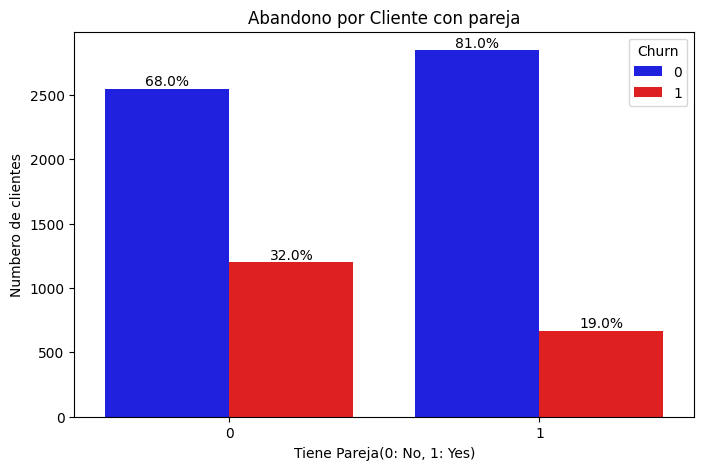

In [45]:

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=datos_original, x='Partner', hue='Churn', palette={0: 'blue', 1: 'red'})
plt.title('Abandono por Cliente con pareja')
plt.xlabel('Tiene Pareja(0: No, 1: Yes)')
plt.ylabel('Numbero de clientes')

total_counts = datos_original.groupby('Partner')['Churn'].count()
churn_counts = datos_original.groupby(['Partner', 'Churn'])['Churn'].count().unstack()


churn_counts = churn_counts.reindex(columns=[0, 1], fill_value=0)


for container in ax.containers:
    churn_status = ax.containers.index(container)

    for p in container.patches:
        x_pos = p.get_x() + p.get_width() / 2
        closest_index = min(range(len(ax.get_xticks())), key=lambda k: abs(ax.get_xticks()[k] - x_pos))
        category = ax.get_xticklabels()[closest_index].get_text()

        category = int(category)


        total = total_counts[category]
        count = churn_counts.loc[category, churn_status]

        if total > 0:
            percentage = f'{100 * count / total:.1f}%'
        else:
            percentage = '0.0%'

        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

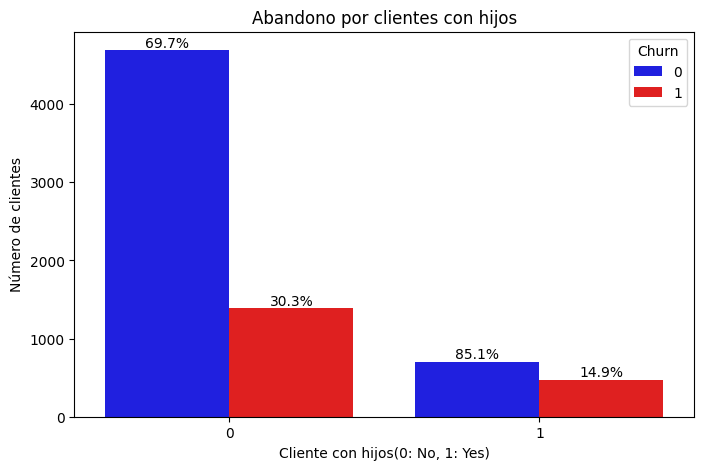

In [46]:

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=datos_original, x='SeniorCitizen', hue='Churn', palette={0: 'blue', 1: 'red'})
plt.title('Abandono por clientes con hijos')
plt.xlabel('Cliente con hijos(0: No, 1: Yes)')
plt.ylabel('Número de clientes')

total_counts = datos_original.groupby('Dependents')['Churn'].count()
churn_counts = datos_original.groupby(['Dependents', 'Churn'])['Churn'].count().unstack()

churn_counts = churn_counts.reindex(columns=[0, 1], fill_value=0)


for container in ax.containers:
    churn_status = ax.containers.index(container)

    for p in container.patches:
        x_pos = p.get_x() + p.get_width() / 2
        closest_index = min(range(len(ax.get_xticks())), key=lambda k: abs(ax.get_xticks()[k] - x_pos))
        category = ax.get_xticklabels()[closest_index].get_text()

        category = int(category)


        total = total_counts[category]
        count = churn_counts.loc[category, churn_status]

        if total > 0:
            percentage = f'{100 * count / total:.1f}%'
        else:
            percentage = '0.0%'

        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

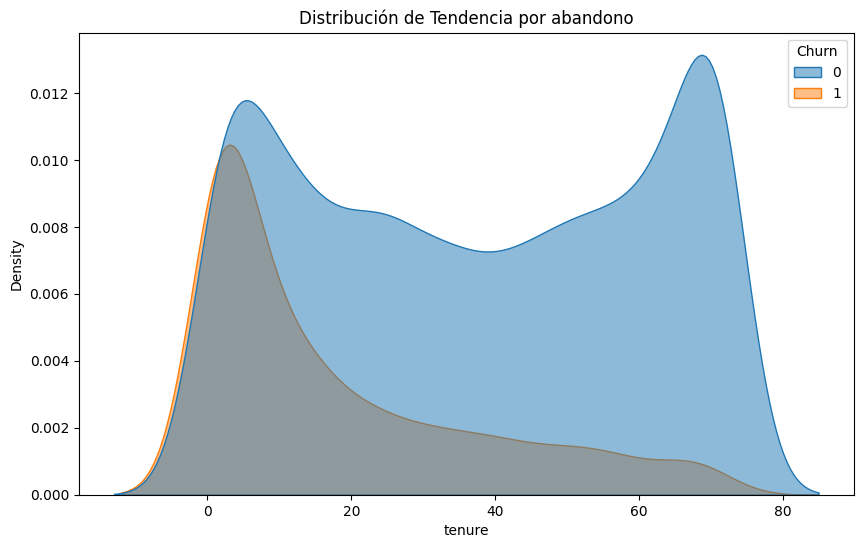

In [47]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=datos, x='tenure', hue='Churn', fill=True, alpha=0.5)
plt.title("Distribución de Tendencia por abandono")
plt.show()

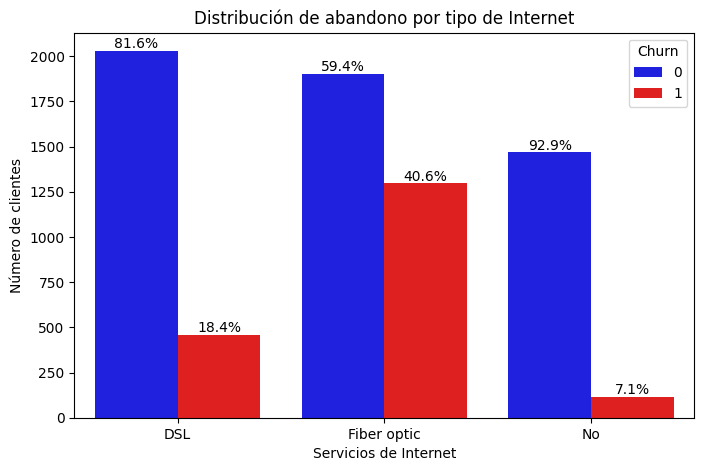

In [48]:

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=datos_original, x='InternetService', hue='Churn', palette={0: 'blue', 1: 'red'})
plt.title('Distribución de abandono por tipo de Internet')
plt.xlabel('Servicios de Internet')
plt.ylabel('Número de clientes')

total_counts = datos_original.groupby('InternetService')['Churn'].count()

hue_levels = datos_original['Churn'].unique()
hue_levels.sort()


for i, container in enumerate(ax.containers):
    churn_status = hue_levels[i]

    for p in container.patches:
        x_pos = p.get_x() + p.get_width() / 2
        closest_index = min(range(len(ax.get_xticks())), key=lambda k: abs(ax.get_xticks()[k] - x_pos))
        internet_service = ax.get_xticklabels()[closest_index].get_text()

        total = total_counts[internet_service]
        count = p.get_height()

        if total > 0:
            percentage = f'{100 * count / total:.1f}%'
        else:
            percentage = '0.0%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

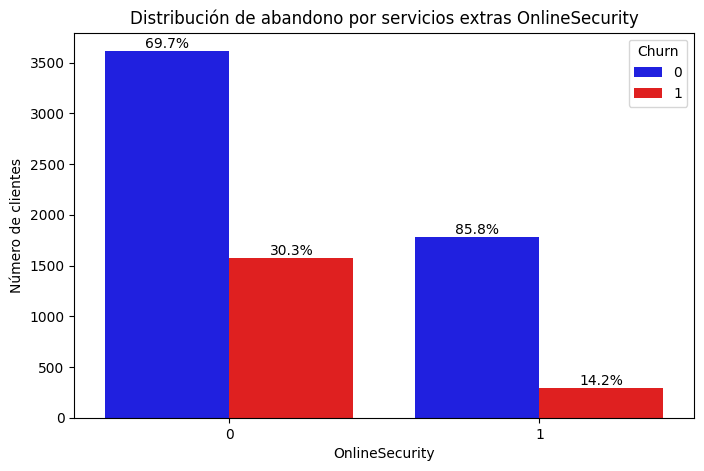

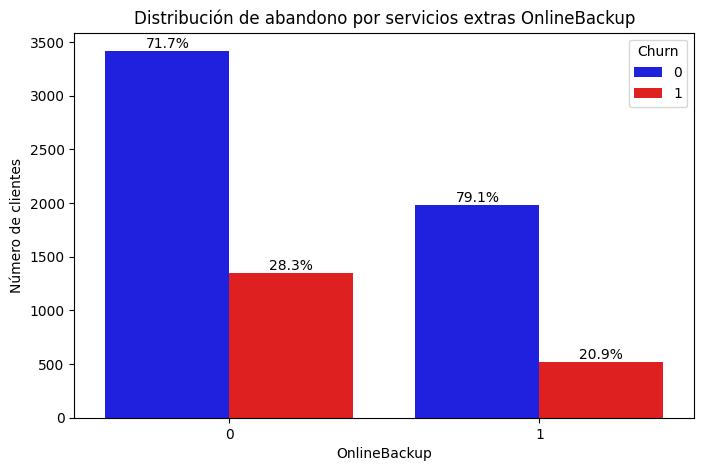

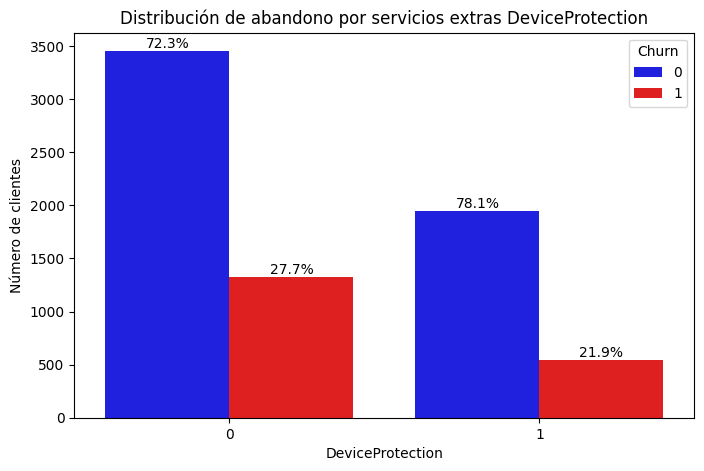

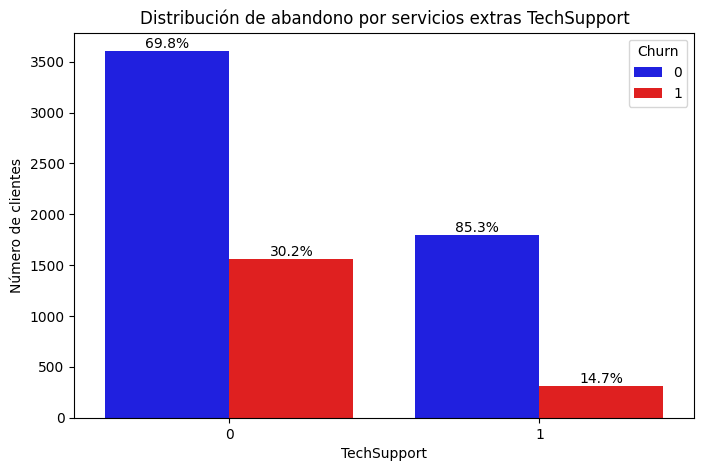

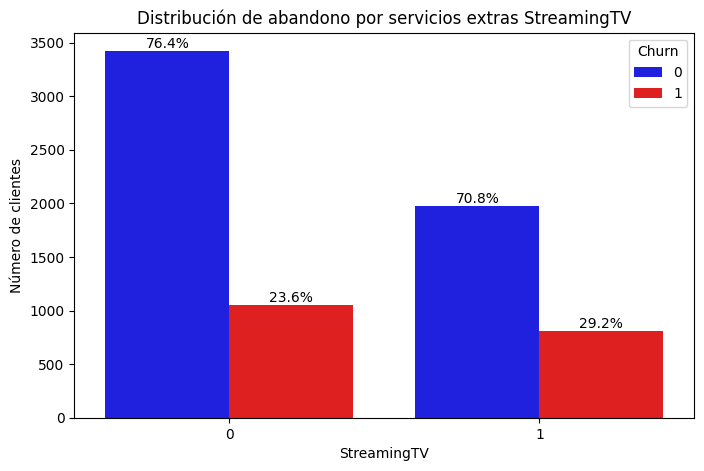

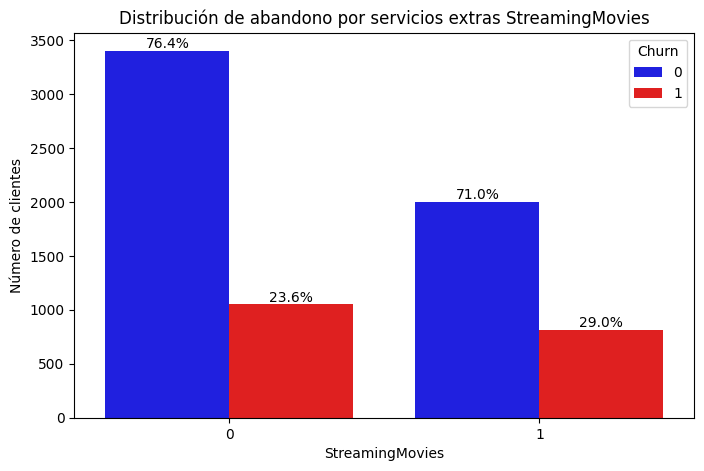

In [49]:

columns_to_plot = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=datos_original, x=col, hue='Churn', palette={0: 'blue', 1: 'red'})
    plt.title(f'Distribución de abandono por servicios extras {col}')
    plt.xlabel(col)
    plt.ylabel('Número de clientes')

    total_counts = datos_original.groupby(col)['Churn'].count()
    churn_counts = datos_original.groupby([col, 'Churn'])['Churn'].count().unstack()

    churn_counts = churn_counts.reindex(columns=[0, 1], fill_value=0)


    for container in ax.containers:

        churn_status = ax.containers.index(container)

        for p in container.patches:
            x_pos = p.get_x() + p.get_width() / 2
            closest_index = min(range(len(ax.get_xticks())), key=lambda k: abs(ax.get_xticks()[k] - x_pos))
            category = ax.get_xticklabels()[closest_index].get_text()


            if datos_original[col].dtype in ['int64', 'float64']:
                 category = int(category)



            total = total_counts[category]

            count = churn_counts.loc[category, churn_status]



            if total > 0:
                percentage = f'{100 * count / total:.1f}%'
            else:
                percentage = '0.0%'


            ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.show()

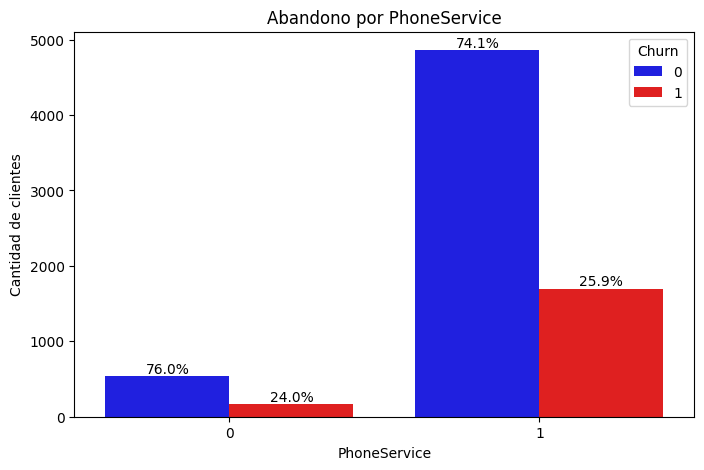

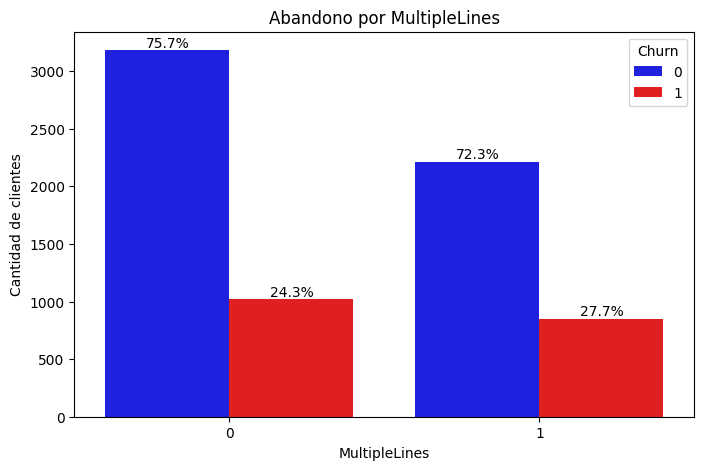

In [50]:

columns_to_plot = ['PhoneService', 'MultipleLines']

for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=datos_original, x=col, hue='Churn', palette={0: 'blue', 1: 'red'})
    plt.title(f'Abandono por {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de clientes')


    total_counts = datos_original.groupby(col)['Churn'].count()
    churn_counts = datos_original.groupby([col, 'Churn'])['Churn'].count().unstack()

    churn_counts = churn_counts.reindex(columns=[0, 1], fill_value=0)

    for container in ax.containers:
        churn_status = ax.containers.index(container)

        for p in container.patches:
            x_pos = p.get_x() + p.get_width() / 2
            closest_index = min(range(len(ax.get_xticks())), key=lambda k: abs(ax.get_xticks()[k] - x_pos))
            category = ax.get_xticklabels()[closest_index].get_text()

            if datos_original[col].dtype in ['int64', 'float64']:
                 category = int(category)



            total = total_counts[category]
            count = churn_counts.loc[category, churn_status]



            if total > 0:
                percentage = f'{100 * count / total:.1f}%'
            else:
                percentage = '0.0%'

            ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')


    plt.show()

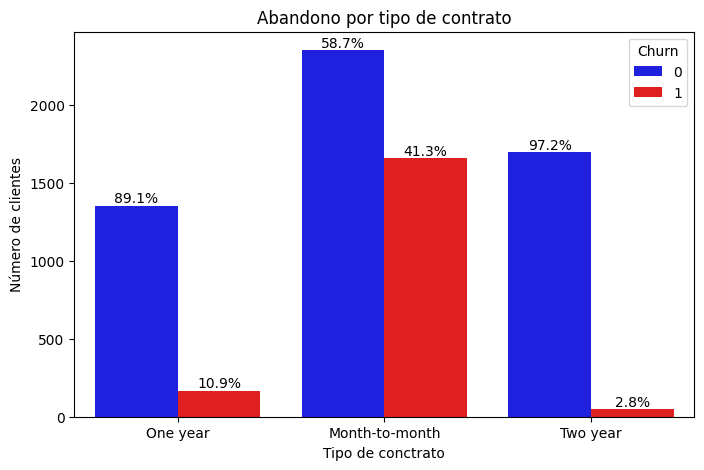

In [51]:

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=datos_original, x='Contract', hue='Churn', palette={0: 'blue', 1: 'red'})
plt.title('Abandono por tipo de contrato')
plt.xlabel('Tipo de conctrato')
plt.ylabel('Número de clientes')

total_counts = datos_original.groupby('Contract')['Churn'].count()
churn_counts = datos_original.groupby(['Contract', 'Churn'])['Churn'].count().unstack()


churn_counts = churn_counts.reindex(columns=[0, 1], fill_value=0)


for container in ax.containers:
    churn_status = ax.containers.index(container)

    for p in container.patches:
        x_pos = p.get_x() + p.get_width() / 2
        closest_index = min(range(len(ax.get_xticks())), key=lambda k: abs(ax.get_xticks()[k] - x_pos))
        category = ax.get_xticklabels()[closest_index].get_text()

        total = total_counts[category]
        count = churn_counts.loc[category, churn_status]


        if total > 0:
            percentage = f'{100 * count / total:.1f}%'
        else:
            percentage = '0.0%'

        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

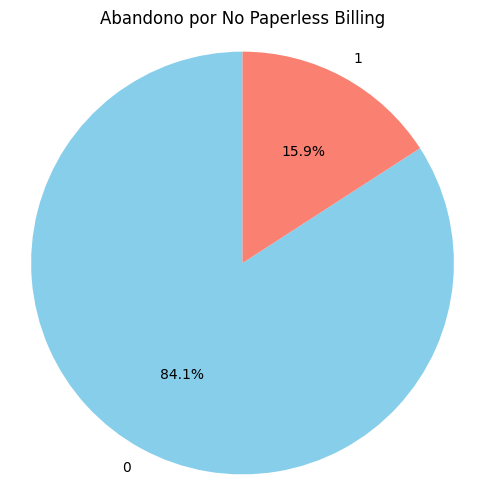

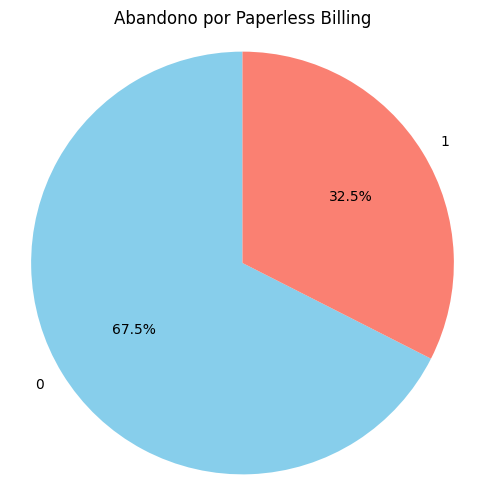

In [52]:

paperless_churn_counts = datos_original.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0)

paperless_churn_percentages = paperless_churn_counts.apply(lambda x: x / x.sum() * 100, axis=1)

for paperless_status in paperless_churn_percentages.index:
    status_label = 'No Paperless Billing' if paperless_status == 0 else 'Paperless Billing'

    plt.figure(figsize=(6, 6))
    plt.pie(paperless_churn_percentages.loc[paperless_status], labels=paperless_churn_percentages.columns, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
    plt.title(f'Abandono por {status_label}')
    plt.axis('equal')
    plt.show()

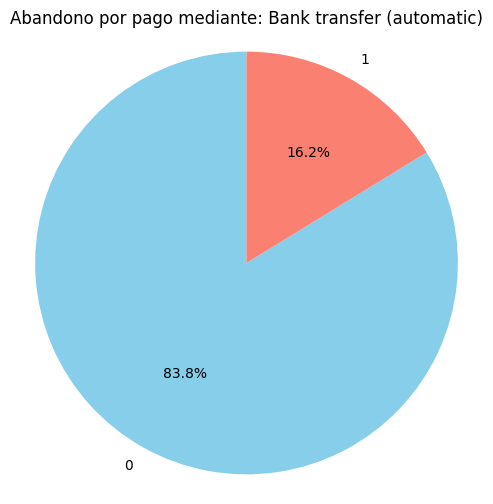

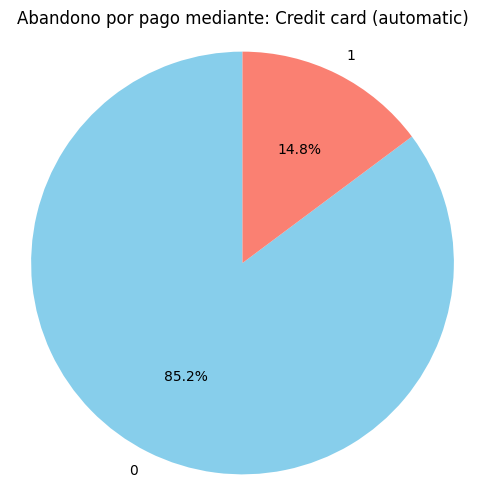

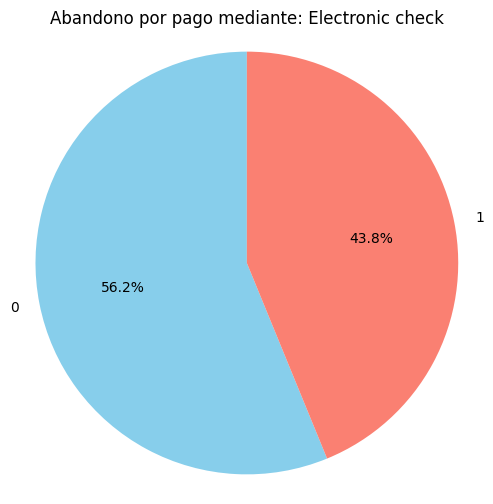

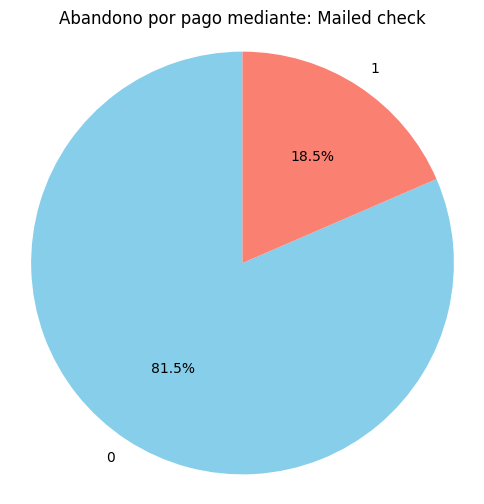

In [53]:

payment_churn_counts = datos_original.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)

payment_churn_percentages = payment_churn_counts.apply(lambda x: x / x.sum() * 100, axis=1)

for payment_method in payment_churn_percentages.index:
    plt.figure(figsize=(6, 6))
    plt.pie(payment_churn_percentages.loc[payment_method], labels=payment_churn_percentages.columns, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
    plt.title(f'Abandono por pago mediante: {payment_method}')
    plt.axis('equal')
    plt.show()

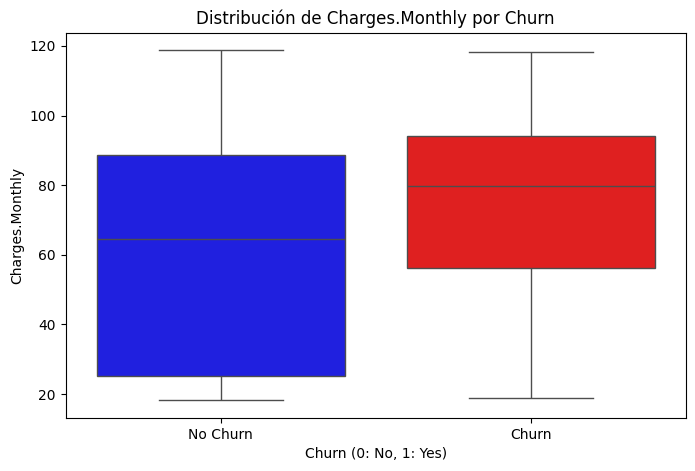

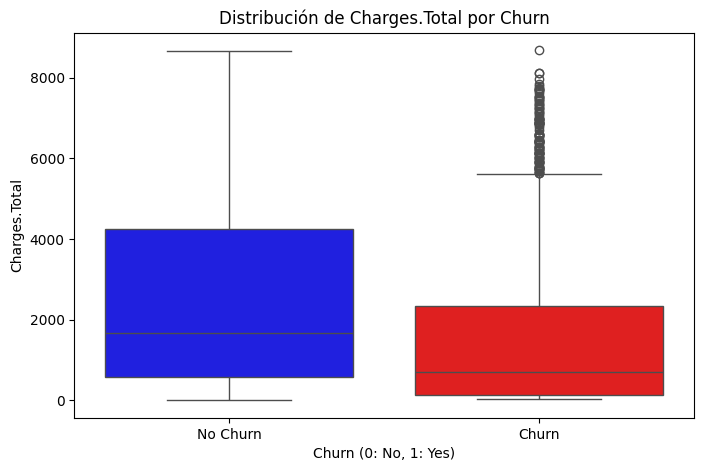

In [54]:
numerical_features = ['Charges.Monthly', 'Charges.Total']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=datos_original, x='Churn', y=feature, palette={'0': 'blue', '1': 'red'})
    plt.title(f'Distribución de {feature} por Churn')
    plt.xlabel('Churn (0: No, 1: Yes)')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['No Churn', 'Churn'])
    plt.show()

### Análisis de los gráficos para su siguiente utilización en el modelo ###
Primero se generó un gráfico con la distribución de los clientes activos y los que abandonaron la empresa.
Se realizo una exploración de la relación entre las variables categóricas y Churn.

Género: No parece haber una diferencia significativa en la tasa de evasión entre hombres y mujeres.

SeniorCitizen: Los ciudadanos mayores  parecen tener una tasa de evasión ligeramente mayor que los clientes más jóvenes.

Partner y Dependents: Los clientes sin pareja  y sin dependientes  =  muestran una mayor tendencia a la evasión en comparación con aquellos que sí los tienen.

Tenure: Hay un pico de clientes con poca antigüedad (pocos meses).
Se puede ver que la densidad de clientes que abandonan es mayor en los primeros meses de servicio. Esto sugiere que los clientes nuevos tienen una mayor probabilidad de irse.
A medida que la antigüedad aumenta, la densidad de clientes que abandonan disminuye, lo que indica que los clientes con más tiempo en la empresa tienden a ser más leales.

PhoneService y MultipleLines: La mayoría de los clientes tienen servicio telefónico. No parece haber un diferencia sustancial en cuanto a la evasión de clientes con respecto a la utilización de linea telefónica individual o multiple.

InternetService: Los clientes con servicio de Fibra Óptica (Fiber optic) muestran una tasa de evasión considerablemente más alta que aquellos con DSL o sin servicio de internet. Representa un posible problema en cuanto a el rendimiento de la fibra óptica.

Servicios Adicionales de Internet (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies): Los clientes que no tienen estos servicios adicionales de internet (No internet service o No) tienden a evadir más que aquellos que sí los tienen. Esto sugiere que estos servicios adicionales contribuyen a la retención.

Contract: Los clientes con contratos mes a mes (Month-to-month) tienen una tasa de evasión mucho mayor en comparación con los contratos de uno o dos años.

PaperlessBilling: Los clientes que prefieren la facturación electrónica (Yes) parecen tener una tasa de evasión mayor.

PaymentMethod: El método de pago "Electronic check" muestra una tasa de evasión significativamente más alta que otros métodos de pago.

Distribución de los abandonos por cargos mensuales: El gráfico muestra que los clientes que abandonan la empresa tienden a tener cargos mensuales más elevados. Hay una densidad mayor de clientes que abandonaron en el rango de cargos mensuales más altos en comparación con los clientes que se quedaron. Esto sugiere que un costo mensual alto puede ser un factor que contribuye al abandono.

Charges.Monthly y	Charges.TotalDistribución: En contraste con los cargos mensuales, los cargos totales indica que los clientes que abandonan se concentran en los cargos totales más bajos. Esto es coherente con el análisis de la antigüedad (tenure). Los clientes que abandonan suelen tener una menor antigüedad en la empresa, lo que resulta en cargos totales acumulados más bajos en comparación con los clientes leales que han estado con la empresa por más tiempo.

## Normalización y análisis para generar los modelos ##

In [55]:
datos.Churn.value_counts()

,count
Churn,
0,5398
1,1869


In [56]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  


In [57]:

# Identificar las columnas categóricas (excluyendo la variable objetivo 'Churn')
categorical_cols = datos.select_dtypes(include='object').columns.tolist()
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

# Aplicar One-Hot Encoding a las columnas categóricas
datos_encoded = pd.get_dummies(datos, columns=categorical_cols, drop_first=True)

encoding_map = {}
for col in categorical_cols:
    new_cols = [c for c in datos_encoded.columns if c.startswith(f'{col}_')]

    original_values = datos[col].unique().tolist()
    if len(new_cols) > 0 and new_cols[0].endswith('_' + original_values[-1]):
        original_values = original_values[:-1]


    col_mapping = {}
    for i, new_col in enumerate(new_cols):
        original_value_from_col = new_col[len(col) + 1:]
        col_mapping[original_value_from_col] = new_col

    encoding_map[col] = col_mapping


# Mostrar las primeras filas e información del DataFrame codificado
print("DataFrame df_models después de One-Hot Encoding:")
display(datos_encoded.head())
datos_encoded.info()

# Mostrar el diccionario de mapeo
print("\nDiccionario de Mapeo de la Codificación:")
print(json.dumps(encoding_map, indent=4))

DataFrame df_models después de One-Hot Encoding:


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Charges.Monthly,Charges.Total,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,65.6,593.30,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,59.9,542.40,True,False,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,0,1,...,73.9,280.85,True,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,98.0,1237.85,True,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,83.9,267.40,False,True,False,False,False,False,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7267 non-null   int64  
 1   SeniorCitizen                          7267 non-null   int64  
 2   Partner                                7267 non-null   int64  
 3   Dependents                             7267 non-null   int64  
 4   tenure                                 7267 non-null   int64  
 5   PhoneService                           7267 non-null   int64  
 6   MultipleLines                          7267 non-null   int64  
 7   OnlineSecurity                         7267 non-null   int64  
 8   OnlineBackup                           7267 non-null   int64  
 9   DeviceProtection                       7267 non-null   int64  
 10  TechSupport                            7267 non-null   int64  
 11  Stre

In [58]:
# Calcular la proporción de clientes que cancelaron (Churn)
churn_proportion = datos_encoded['Churn'].value_counts(normalize=True) * 100

print("Proporción de clientes por Churn:")
print(churn_proportion)


minority_class_percentage = churn_proportion.min()
if minority_class_percentage < 20: # Umbral comúnmente utilizado, puede ajustarse
    print("\nExiste un desbalance significativo en la variable objetivo 'Churn'.")
else:
    print("\nNo parece haber un desbalance significativo en la variable objetivo 'Churn'.")


Proporción de clientes por Churn:
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64

No parece haber un desbalance significativo en la variable objetivo 'Churn'.


In [59]:


# Identificar las columnas numéricas (excluyendo la variable objetivo 'Churn', que no es numérica)
# Excluimos 'Churn' ya que es la variable objetivo y no debe ser escalada
numerical_cols = datos_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a las columnas numéricas
datos_encoded[numerical_cols] = scaler.fit_transform(datos_encoded[numerical_cols])

# Mostrar las primeras filas e información del DataFrame normalizado
print("DataFrame datos_encoded después de la normalización:")
display(datos_encoded.head())
datos_encoded.info()

DataFrame datos_encoded después de la normalización:


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Charges.Monthly,Charges.Total,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,1.0,0.125000,1.0,0.0,0.0,1.0,0.0,...,0.471144,0.068315,False,False,False,True,False,False,False,True
1,0.0,0.0,0.0,0.0,0.125000,1.0,1.0,0.0,0.0,0.0,...,0.414428,0.062454,True,False,False,False,False,False,False,True
2,1.0,0.0,0.0,0.0,0.055556,1.0,0.0,0.0,0.0,1.0,...,0.553731,0.032338,True,True,False,False,False,False,True,False
3,1.0,1.0,1.0,0.0,0.180556,1.0,0.0,0.0,1.0,1.0,...,0.793532,0.142531,True,True,False,False,False,False,True,False
4,1.0,1.0,1.0,0.0,0.041667,1.0,0.0,0.0,0.0,0.0,...,0.653234,0.030789,False,True,False,False,False,False,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7267 non-null   float64
 1   SeniorCitizen                          7267 non-null   float64
 2   Partner                                7267 non-null   float64
 3   Dependents                             7267 non-null   float64
 4   tenure                                 7267 non-null   float64
 5   PhoneService                           7267 non-null   float64
 6   MultipleLines                          7267 non-null   float64
 7   OnlineSecurity                         7267 non-null   float64
 8   OnlineBackup                           7267 non-null   float64
 9   DeviceProtection                       7267 non-null   float64
 10  TechSupport                            7267 non-null   float64
 11  Stre

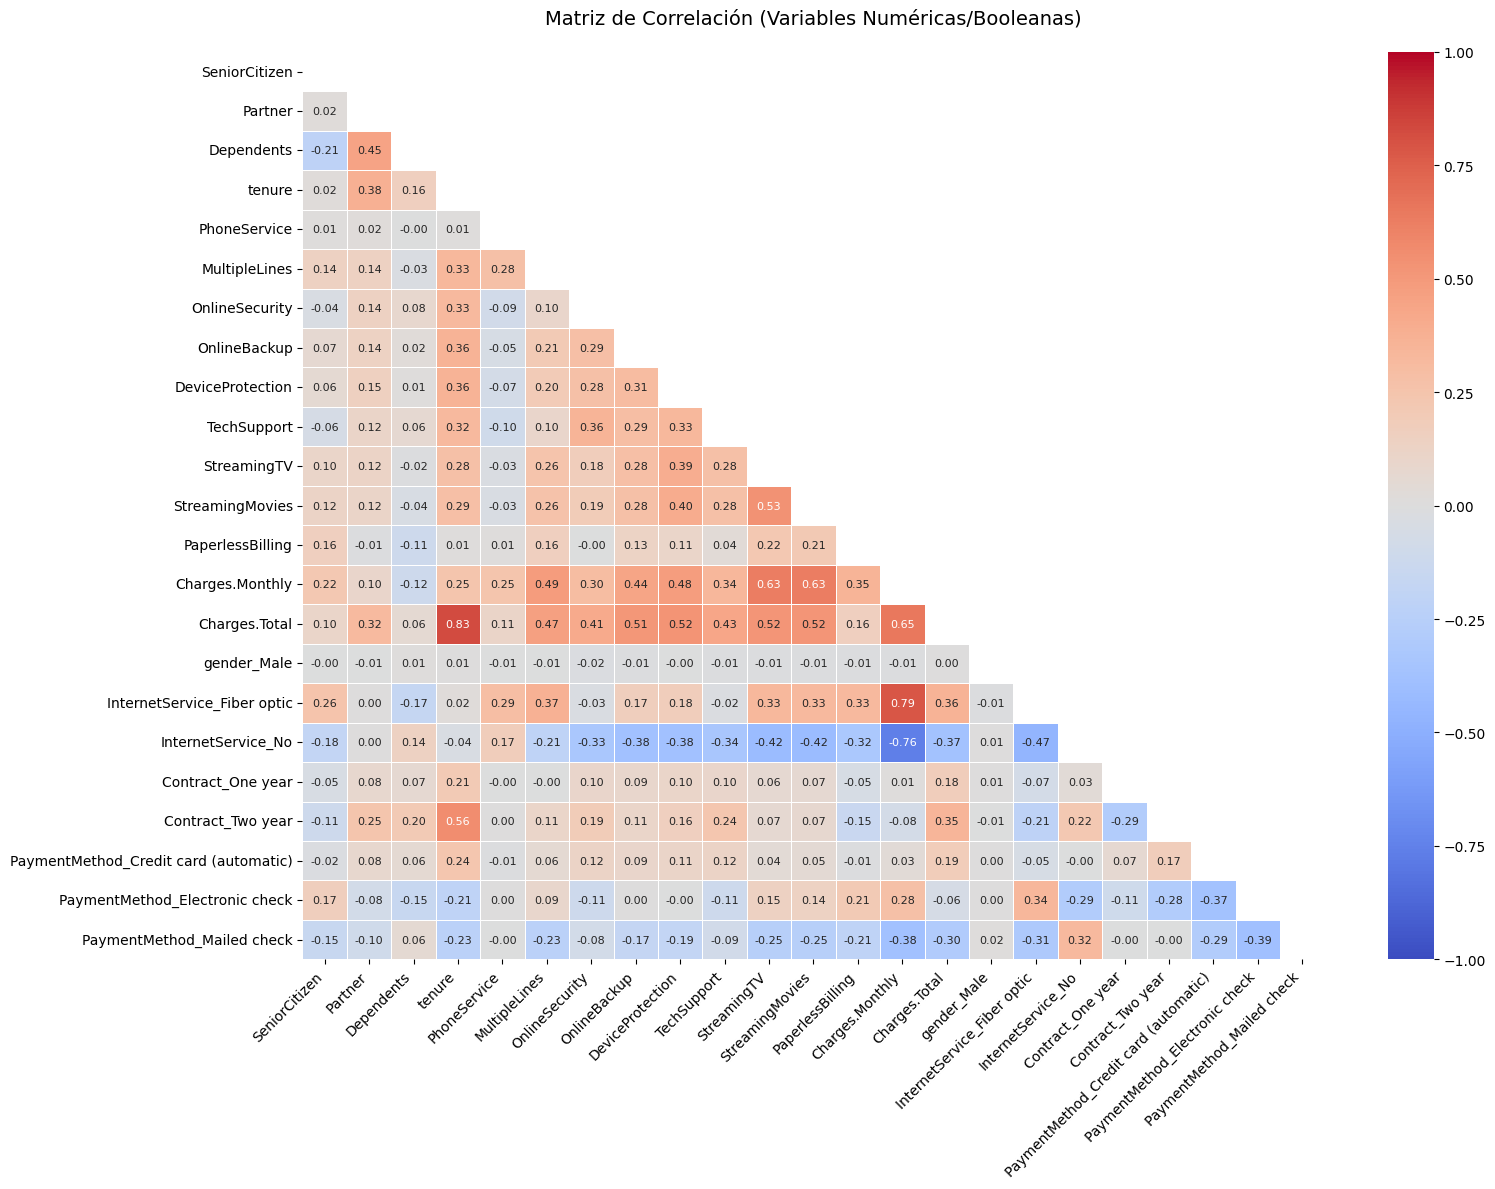

In [60]:
# =============================================================================
# ANÁLISIS DE CORRELACIÓN
# =============================================================================

def plot_correlation_matrix(df, exclude_cols=None, figsize=(15, 10)):
    """
    Genera una matriz de correlación mejorada para columnas numéricas/booleanas.

    Parámetros:
    -----------
    df : DataFrame
        DataFrame de entrada
    exclude_cols : list, opcional
        Columnas a excluir del análisis
    figsize : tuple, opcional
        Tamaño de la figura (ancho, alto)
    """
    numeric_bool_cols = df.select_dtypes(include=['number', 'bool']).columns

    if exclude_cols is not None:
        cols_to_analyze = [col for col in numeric_bool_cols if col not in exclude_cols]
    else:
        cols_to_analyze = numeric_bool_cols

    correlation_matrix = df[cols_to_analyze].corr(numeric_only=True)

    plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    sns.heatmap(
        correlation_matrix,
        mask=mask,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=0.5,
        center=0,
        vmin=-1,
        vmax=1,
        annot_kws={"size": 8}
    )

    plt.title('Matriz de Correlación (Variables Numéricas/Booleanas)', pad=20, fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

plot_correlation_matrix(
    df=datos_encoded,
    exclude_cols=['Churn'],
    figsize=(16, 12)
)

In [61]:
X=datos_encoded.drop('Churn', axis=1)
y=datos_encoded['Churn']

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



=== Decision Tree ===
Exactitud en entrenamiento: 0.72
Exactitud en validación: 0.73

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.92      0.69      0.79      1082
         1.0       0.48      0.83      0.61       372

    accuracy                           0.73      1454
   macro avg       0.70      0.76      0.70      1454
weighted avg       0.81      0.73      0.74      1454



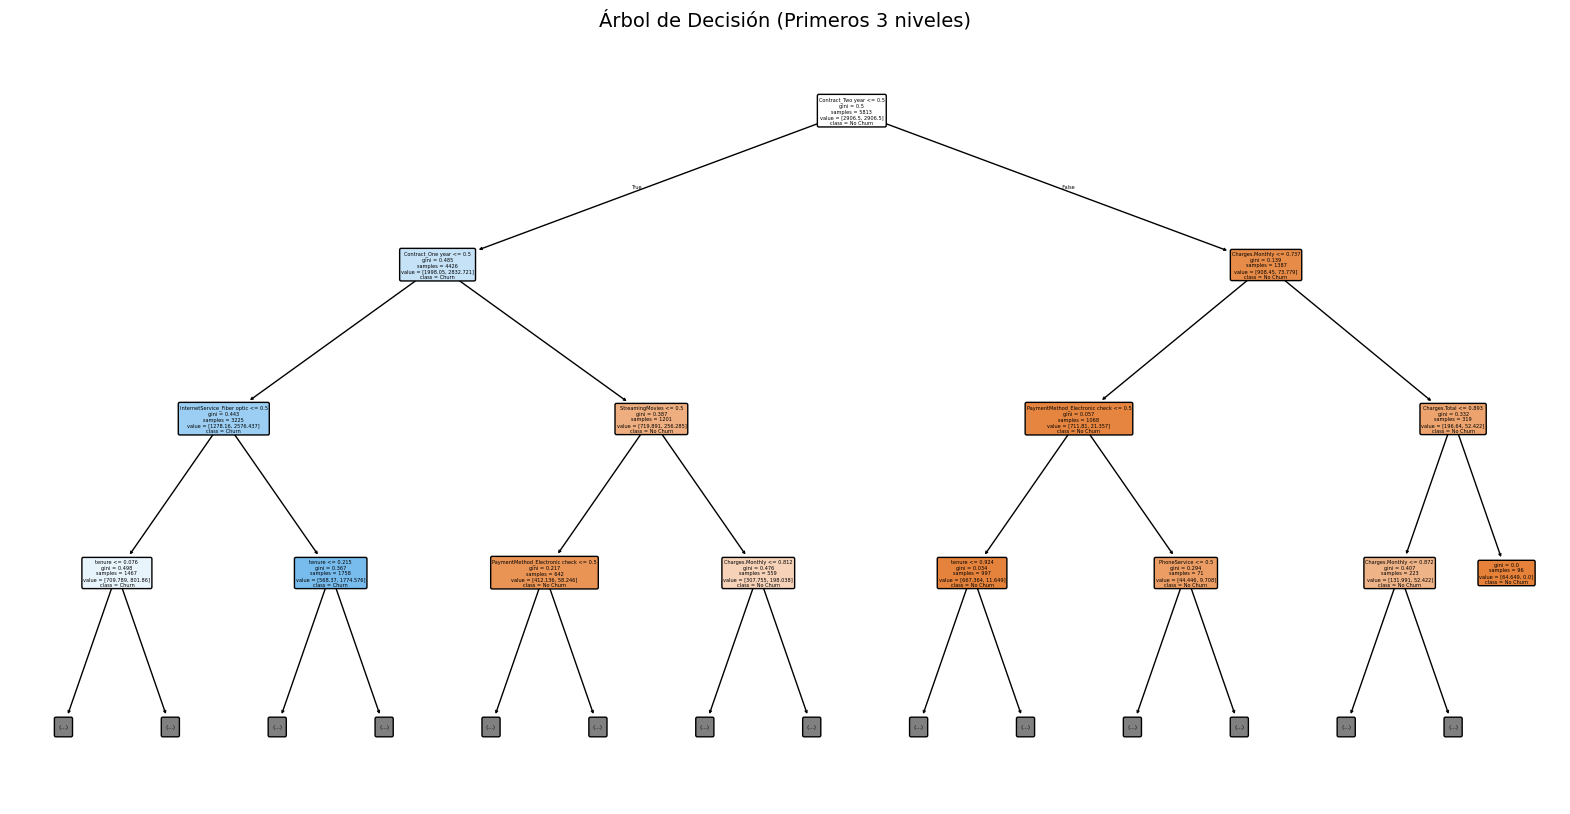

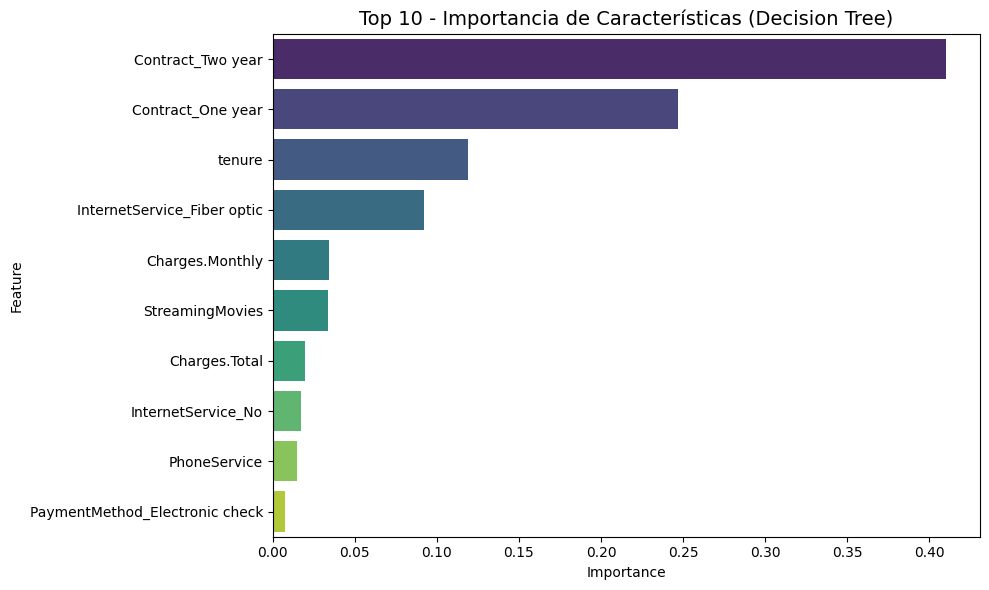

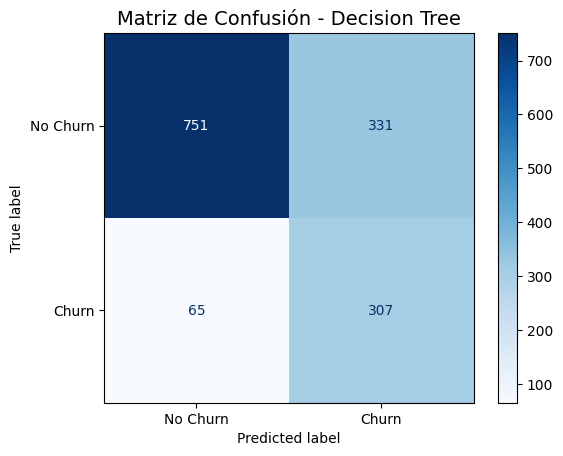

In [63]:
# =============================================
# 1. Decision Tree Classifier + Gráficos
# =============================================
tree_clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    random_state=42,
    class_weight='balanced'
)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_val)

print("\n=== Decision Tree ===")
print(f"Exactitud en entrenamiento: {tree_clf.score(X_train, y_train):.2f}")
print(f"Exactitud en validación: {tree_clf.score(X_val, y_val):.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_val, y_pred_tree))


plt.figure(figsize=(20, 10))
plot_tree(
    tree_clf,
    feature_names=X.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    max_depth=3
)
plt.title("Árbol de Decisión (Primeros 3 niveles)", fontsize=14)
plt.show()

importances = tree_clf.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')
plt.title('Top 10 - Importancia de Características (Decision Tree)', fontsize=14)
plt.tight_layout()
plt.show()

ConfusionMatrixDisplay.from_estimator(
    tree_clf,
    X_val,
    y_val,
    display_labels=['No Churn', 'Churn'],
    cmap='Blues'
)
plt.title('Matriz de Confusión - Decision Tree', fontsize=14)
plt.show()


=== Random Forest ===
Exactitud en entrenamiento: 0.84
Exactitud en validación: 0.77

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84      1082
         1.0       0.54      0.72      0.62       372

    accuracy                           0.77      1454
   macro avg       0.71      0.75      0.73      1454
weighted avg       0.80      0.77      0.78      1454



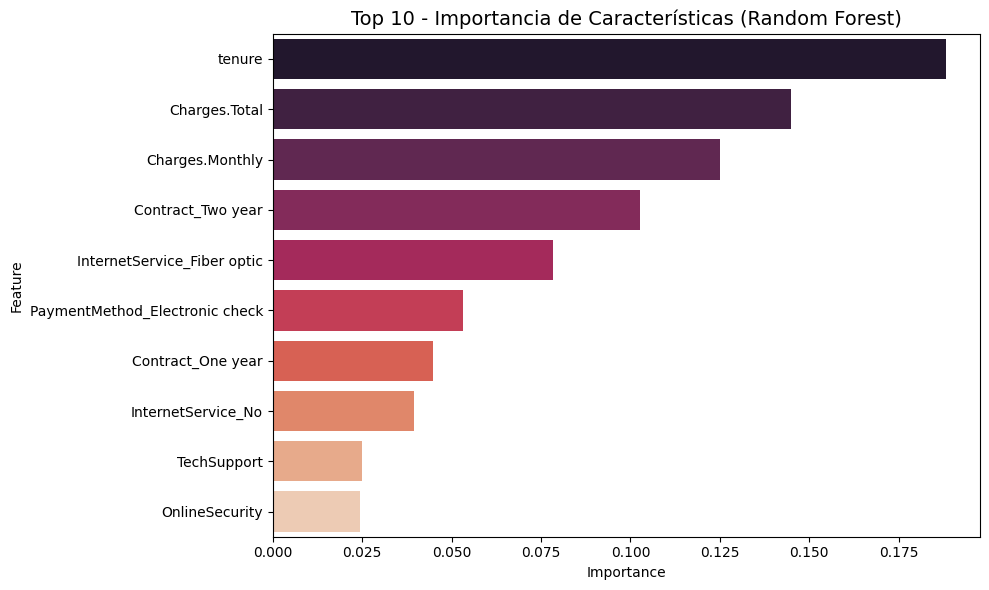

<Figure size 1000x600 with 0 Axes>

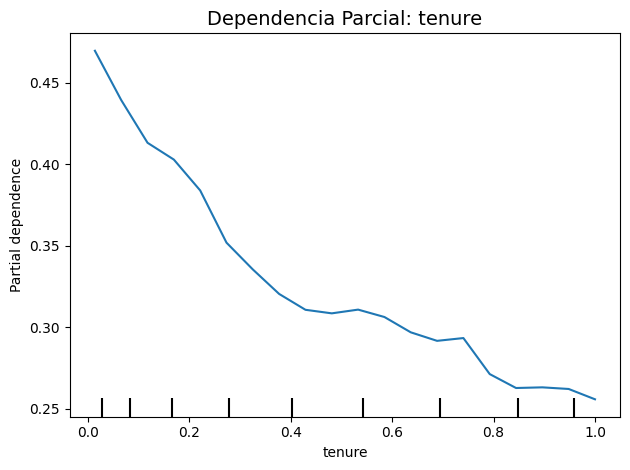

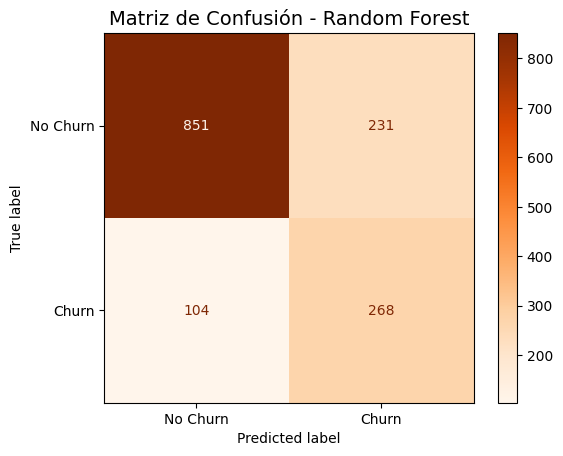

In [64]:
# =============================================
# 2. Random Forest Classifier  + Gráficos
# =============================================

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_val)

print("\n=== Random Forest ===")
print(f"Exactitud en entrenamiento: {rf_clf.score(X_train, y_train):.2f}")
print(f"Exactitud en validación: {rf_clf.score(X_val, y_val):.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_val, y_pred_rf))

importances = rf_clf.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='rocket')
plt.title('Top 10 - Importancia de Características (Random Forest)', fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_train,
    features=[features_df.index[0]],
    feature_names=X.columns,
    grid_resolution=20
)
plt.title(f'Dependencia Parcial: {features_df.iloc[0].Feature}', fontsize=14)
plt.tight_layout()
plt.show()

ConfusionMatrixDisplay.from_estimator(
    rf_clf,
    X_val,
    y_val,
    display_labels=['No Churn', 'Churn'],
    cmap='Oranges'
)
plt.title('Matriz de Confusión - Random Forest', fontsize=14)
plt.show()


=== Logistic Regression ===
Exactitud en entrenamiento: 0.74
Exactitud en validación: 0.76

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      1082
         1.0       0.52      0.81      0.63       372

    accuracy                           0.76      1454
   macro avg       0.72      0.78      0.73      1454
weighted avg       0.82      0.76      0.77      1454



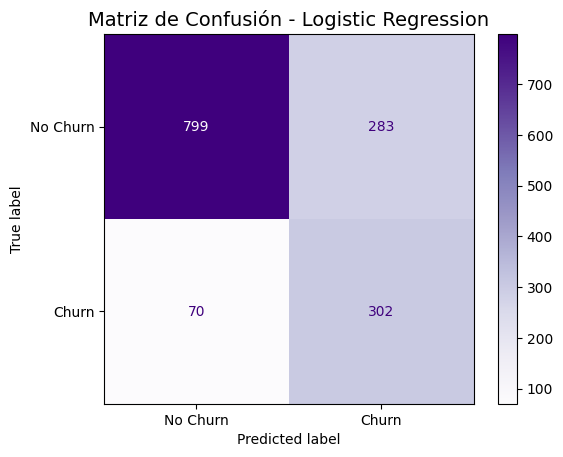

In [65]:
# =============================================
# 3. Regreción logística
# =============================================

logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_val)

print("\n=== Logistic Regression ===")
print(f"Exactitud en entrenamiento: {logreg.score(X_train, y_train):.2f}")
print(f"Exactitud en validación: {logreg.score(X_val, y_val):.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_val, y_pred_logreg))

ConfusionMatrixDisplay.from_estimator(
    logreg,
    X_val,
    y_val,
    display_labels=['No Churn', 'Churn'],
    cmap='Purples'
)
plt.title('Matriz de Confusión - Logistic Regression', fontsize=14)
plt.show()

=== Decision Tree (Tuned with F1-score) ===
Mejores parámetros: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 2}
Mejor F1-score en validación (CV): 0.59

Reporte de clasificación en validación:
              precision    recall  f1-score   support

         0.0       0.92      0.69      0.79      1082
         1.0       0.48      0.83      0.61       372

    accuracy                           0.73      1454
   macro avg       0.70      0.76      0.70      1454
weighted avg       0.81      0.73      0.74      1454



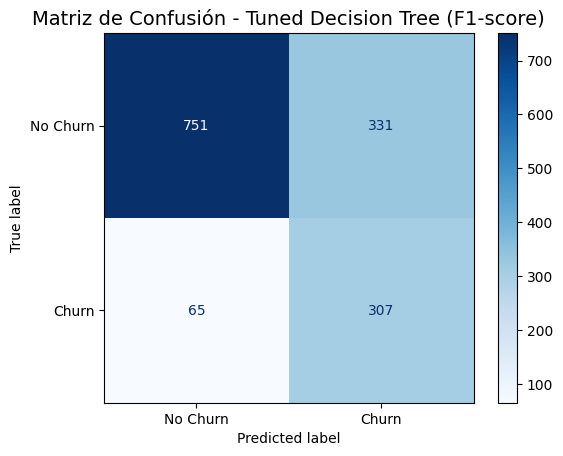

In [66]:
# =============================================
# 1. Decision Tree Classifier - F1-score
# =============================================

tree_params = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

tree_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    tree_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
tree_grid_search.fit(X_train, y_train)

print("=== Decision Tree (Tuned with F1-score) ===")
print(f"Mejores parámetros: {tree_grid_search.best_params_}")
print(f"Mejor F1-score en validación (CV): {tree_grid_search.best_score_:.2f}")

best_tree_clf = tree_grid_search.best_estimator_
y_pred_tuned_tree = best_tree_clf.predict(X_val)

print("\nReporte de clasificación en validación:")
print(classification_report(y_val, y_pred_tuned_tree))

ConfusionMatrixDisplay.from_estimator(
    best_tree_clf,
    X_val,
    y_val,
    display_labels=['No Churn', 'Churn'],
    cmap='Blues'
)
plt.title('Matriz de Confusión - Tuned Decision Tree (F1-score)', fontsize=14)
plt.show()

=== Random Forest (Tuned with F1-score) ===
Mejores parámetros: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Mejor F1-score en validación (CV): 0.62

Reporte de clasificación en validación:
              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81      1082
         1.0       0.50      0.81      0.62       372

    accuracy                           0.74      1454
   macro avg       0.71      0.77      0.71      1454
weighted avg       0.81      0.74      0.76      1454



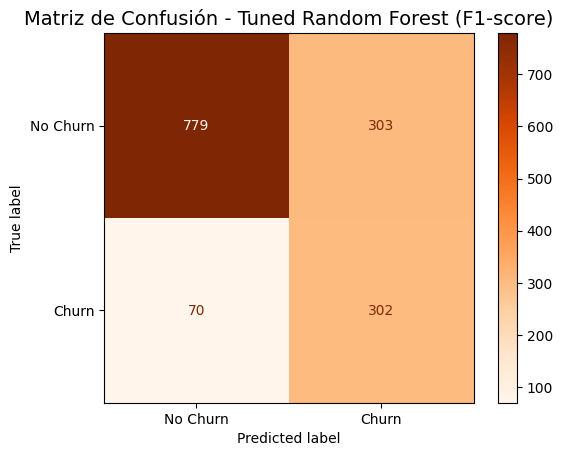

In [67]:
# =============================================
# 2. Random Forest Classifier - F1-score
# =============================================


rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}


rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
rf_grid_search.fit(X_train, y_train)

print("=== Random Forest (Tuned with F1-score) ===")
print(f"Mejores parámetros: {rf_grid_search.best_params_}")
print(f"Mejor F1-score en validación (CV): {rf_grid_search.best_score_:.2f}")

best_rf_clf = rf_grid_search.best_estimator_
y_pred_tuned_rf = best_rf_clf.predict(X_val)

print("\nReporte de clasificación en validación:")
print(classification_report(y_val, y_pred_tuned_rf))

ConfusionMatrixDisplay.from_estimator(
    best_rf_clf,
    X_val,
    y_val,
    display_labels=['No Churn', 'Churn'],
    cmap='Oranges'
)
plt.title('Matriz de Confusión - Tuned Random Forest (F1-score)', fontsize=14)
plt.show()

=== Logistic Regression (Tuned with F1-score) ===
Mejores parámetros: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Mejor F1-score en validación (CV): 0.61

Reporte de clasificación en validación:
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      1082
         1.0       0.52      0.81      0.63       372

    accuracy                           0.76      1454
   macro avg       0.72      0.77      0.72      1454
weighted avg       0.82      0.76      0.77      1454



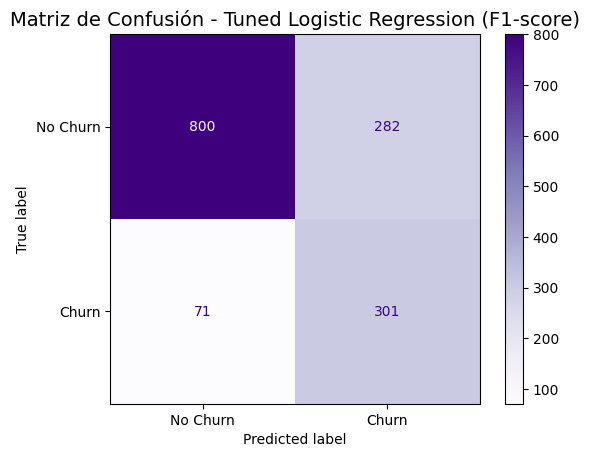

In [68]:
# =============================================
# 3. Logistic Regression - F1-score
# =============================================

logreg_params = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced'],
    'solver': ['liblinear']}

logreg_grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    logreg_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
logreg_grid_search.fit(X_train, y_train)

print("=== Logistic Regression (Tuned with F1-score) ===")
print(f"Mejores parámetros: {logreg_grid_search.best_params_}")
print(f"Mejor F1-score en validación (CV): {logreg_grid_search.best_score_:.2f}")

best_logreg_clf = logreg_grid_search.best_estimator_
y_pred_tuned_logreg = best_logreg_clf.predict(X_val)

print("\nReporte de clasificación en validación:")
print(classification_report(y_val, y_pred_tuned_logreg))

ConfusionMatrixDisplay.from_estimator(
    best_logreg_clf,
    X_val,
    y_val,
    display_labels=['No Churn', 'Churn'],
    cmap='Purples'
)
plt.title('Matriz de Confusión - Tuned Logistic Regression (F1-score)', fontsize=14)
plt.show()

## Conclusiones
Después de un análisis exhaustivo, preprocesamiento, entrenamiento de modelos y ajuste de hiperparámetros para predecir el abandono de clientes (Churn), podemos sacar las siguientes conclusiones y realizar una limpieza del notebook:

1.  **Factores Determinantes del Abandono:** Los análisis gráficos y las importancias de características de los modelos confirman consistentemente que los factores más influyentes en el abandono de clientes son:
    *   **Antigüedad (tenure):** Clientes con menor tiempo en la empresa son más propensos a abandonar.
    *   **Tipo de Contrato:** Los contratos mes a mes tienen una tasa de abandono significativamente más alta que los contratos a largo plazo (uno o dos años).
    *   **Servicio de Internet:** La Fibra Óptica está asociada con un mayor abandono, mientras que no tener servicio de internet se asocia con menor abandono.
    *   **Método de Pago:** El pago electrónico (Electronic Check) es el método con mayor tasa de abandono.
    *   **Cargos:** Cargos mensuales altos y cargos totales bajos (relacionados con baja antigüedad) son predictores de abandono.
    *   **Servicios Adicionales:** La ausencia de servicios de seguridad y soporte técnico aumenta la probabilidad de abandono.

2.  **Impacto del Balanceo de Clases:** La aplicación de `class_weight='balanced'` fue fundamental para mejorar la capacidad de los modelos (especialmente Árbol de Decisión y Regresión Logística) para identificar correctamente la clase minoritaria (Churn), aumentando significativamente el **Recall**. Sin embargo, esto resultó en una disminución de la Precisión y un aumento de los falsos positivos.

3.  **Resultados del Ajuste de Hiperparámetros (Scoring F1):** Al ajustar los hiperparámetros utilizando el F1-score (una métrica más adecuada para datasets desbalanceados):
    *   La **Regresión Logística** sintonizada (`best_logreg_clf`) obtuvo el **mejor F1-score en el conjunto de validación (0.63)** y un alto **Recall (0.81)** para la clase Churn. Esto la posiciona como la mejor opción si el objetivo principal es identificar a la mayor cantidad posible de clientes que van a abandonar.
    *   El **Random Forest** sintonizado (`best_rf_clf`) también mostró un buen F1-score (0.62) y un recall razonable (0.81). Es una alternativa robusta.
    *   El **Árbol de Decisión** sintonizado (`best_tree_clf`) tuvo un F1-score ligeramente menor (0.61) pero un recall comparable (0.83), manteniendo su ventaja en interpretabilidad.

4.  **Modelo Recomendado:** Considerando el balance entre Precision y Recall para la clase minoritaria reflejado en el F1-score, la **Regresión Logística con `class_weight='balanced'` y sintonizada con scoring='f1'** (`best_logreg_clf`) es el modelo más prometedor para este problema de predicción de abandono, especialmente si se prioriza la identificación de clientes en riesgo.

**Recomendaciones:**
1. Retención temprana: Muchos usuarios dan de baja el servicio los primeros meses. Para contrarrestar esto, se necesita un programa de políticas de beneficios para poder mantenerlos.

2. Fibra óptica: Hay una marcada tendencia de abandono del servicio de los usuarios que contratan este tipo de servicio. Se tiene que revisar y mejorar el rendimiento técnico del mismo.

3. Contratos: Fomentar los contratos a largo plazo, ya que son los que menos abandono tienen, mediante algún sistema de beneficios y promociones.

4. Tipos de servicios: Promover la utilización de los servicios adicionales como el streamingTV o de servicio técnico.

5. Control: Mantener un seguimiento de los clientes nuevos y antiguos para poder evitar que abandonen los servicios mediante promociones y beneficios.
